<a href="https://colab.research.google.com/github/SasidharaSrivatchasa/X-ray-Classification/blob/main/PRAICP_1012_Pneumonia_chest_x_ray_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importing all the required libraries for building an training the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Defining Dataset Paths for already saparated data in the dataset(Train, Test, Validation)
train_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/train"
val_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/val"
test_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/train"

In [18]:
# Load Data Using ImageDataGenerator
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [19]:
datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values


In [20]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

print("Data Loaded Successfully!")


Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5226 images belonging to 2 classes.
Data Loaded Successfully!


In [22]:
# Building CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Normal/Pneumonia)
])


In [23]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#Training the Model
EPOCHS = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1645s 10s/step - accuracy: 0.8041 - loss: 0.5090 - val_accuracy: 0.7500 - val_loss: 0.6455
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9453 - loss: 0.1434 - val_accuracy: 0.8750 - val_loss: 0.3097
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9615 - loss: 0.1110 - val_accuracy: 0.8125 - val_loss: 0.2674
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9648 - loss: 0.0993 - val_accuracy: 0.8750 - val_loss: 0.1800
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9712 - loss: 0.0816 - val_accuracy: 0.9375 - val_loss: 0.1808
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9797 - loss: 0.0579 - val_accuracy: 0.8750 - val_loss: 0.2928
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9768 - loss: 0.0649 - val_accuracy: 0.8750 - val_loss: 0.2000
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9809 - loss: 0.0505 - val_ac

In [26]:
# Saving the model in the drive
model.save('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Pneumonia_Chest_Xray_Model.h5')
print("Model saved successfully!")

Model saved successfully!


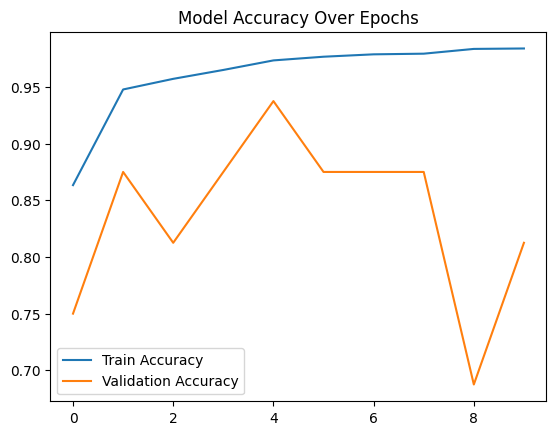

In [27]:

# Ploting Training Performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

In [29]:
# Loading & Test Model
def predict_xray(image_path, model):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(image_path, target_size=IMG_SIZE)
    img = image.img_to_array(img)/255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_name = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
    return class_name

In [30]:
# usage
result = predict_xray('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/test/NORMAL/IM-0001-0001.jpeg', model)  #Testing with the test data from the dataset normal xray image
print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Predicted Class: Normal


In [31]:
# usage
result = predict_xray('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg', model)  #Testing with the test data from the dataset diseased xray image
print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class: Pneumonia
